In [1]:
# Harbinger Package
# version 1.1.707

source("https://raw.githubusercontent.com/cefet-rj-dal/harbinger/master/jupyter.R")

#loading Harbinger
load_library("daltoolbox") 
load_library("harbinger") 

Loading required package: daltoolbox

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform


Loading required package: harbinger



In [2]:
#loading the example database
data(examples_motifs)

In [3]:
#Using the simple time series
dataset <- examples_motifs$mitdb102
head(dataset)

,serie,event,symbol
,<dbl>,<lgl>,<chr>
102992,-0.215,FALSE,N
102993,-0.210,FALSE,N
102994,-0.215,FALSE,N
102995,-0.230,FALSE,N
102996,-0.220,FALSE,N
102997,-0.200,FALSE,N


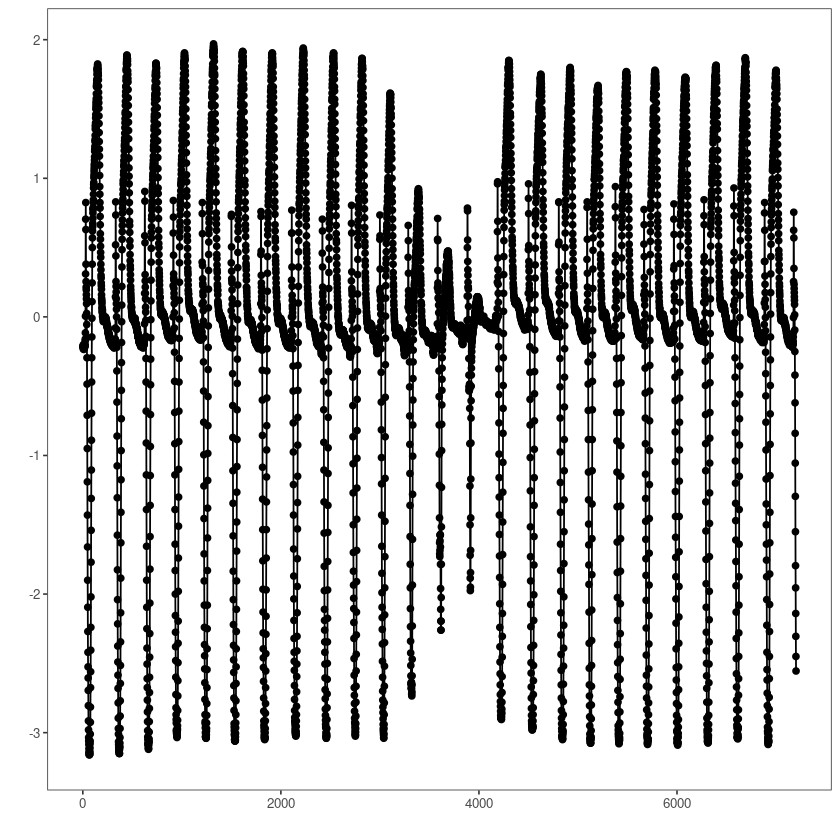

In [4]:
#ploting the time series
plot_ts(x = 1:length(dataset$serie), y = dataset$serie)

In [5]:
# establishing the method  
model <- hdis_mp(mode = "stomp", w = 25, qtd = 10)

In [6]:
# fitting the model
  model <- fit(model, dataset$serie)

In [7]:
# making detections
  suppressMessages(detection <- detect(model, dataset$serie))

In [8]:
# filtering detected events
  print(detection |> dplyr::filter(event==TRUE))

   idx event  type seq seqlen
1 2602  TRUE motif   1     25
2 3844  TRUE motif   1     25
3 4017  TRUE motif   1     25
4 6135  TRUE motif   1     25


In [9]:
# evaluating the detections
  evaluation <- evaluate(model, detection$event, dataset$event)
  print(evaluation$confMatrix)

          event      
detection TRUE  FALSE
TRUE      0     4    
FALSE     3     7195 


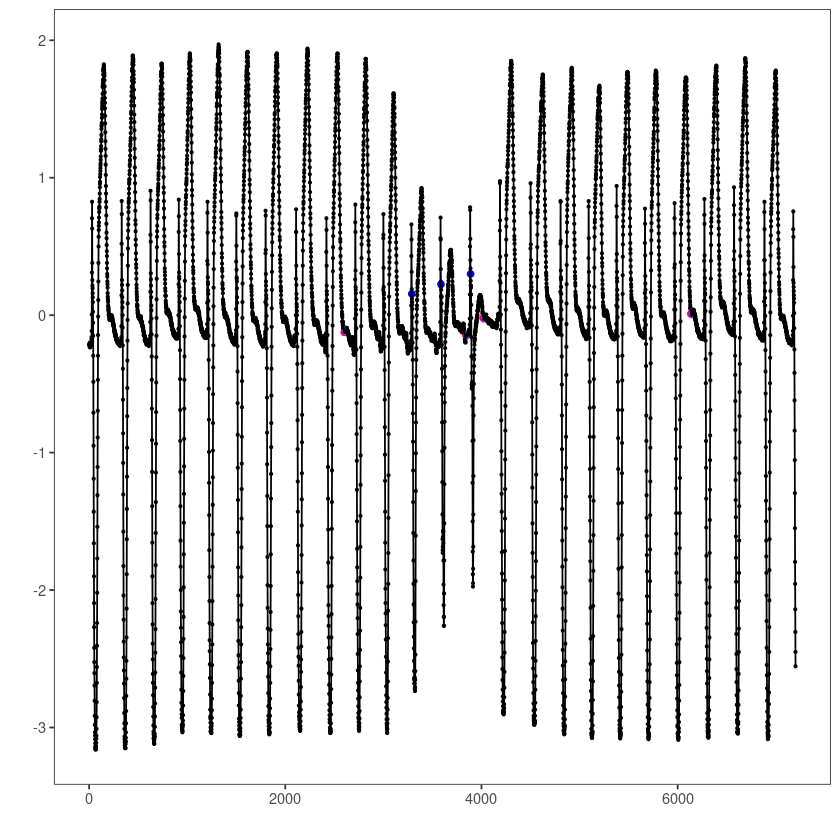

In [10]:
# ploting the results
  grf <- har_plot(model, dataset$serie, detection, dataset$event)
  plot(grf)